In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from sklearn.preprocessing import scale
import import_ipynb
import svm_pipeline





importing Jupyter notebook from svm_pipeline.ipynb
a


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

type(x_train)


11501568/11490434 [==============================] - 1s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


numpy.ndarray

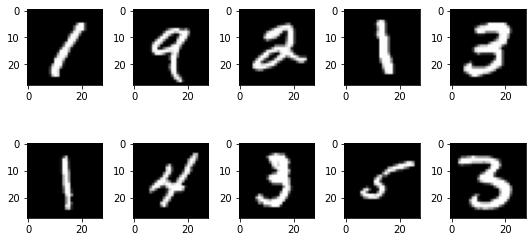

In [6]:
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i+3], cmap='gray')
plt.tight_layout()
plt.show()

In [7]:
 #merging all data into single set
y = np.concatenate((y_train,y_test))
x = np.concatenate((x_train,x_test))

print(x.shape)
print(y.shape)

(70000, 28, 28)
(70000,)


In [8]:
#verify clean join of x and y

for i in range(70000):
    clean = True
    if(i<60000):  
        if((x[i] != x_train[i]).all() or y[i] != y_train[i]):
            clean=False
            break
    else:
        if((x[i] != x_test[i-60000]).all() or y[i] != y_test[i-60000]):
            clean=False
            break
print(clean)

True


Text(0.5, 1.0, 'Number of digit classes')

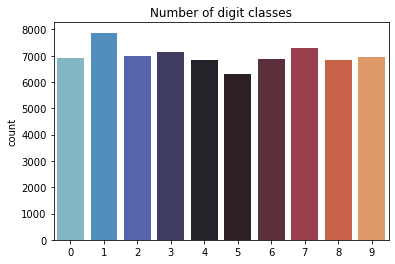

In [9]:
plt.plot(figure = (16,10))
g = sns.countplot(x=y, palette = 'icefire')
plt.title('Number of digit classes')


In [10]:
#reshaping
x_train = x_train.reshape(len(x_train),-1)
x_test = x_test.reshape(len(x_test),-1)


In [11]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train = scale(x_train)
x_test = scale(x_test)

In [12]:
svm_pipeline.apply_svm(x_train,x_test,y_train,y_test,'rbf',2,[ {'C': [5],
              'gamma': [0.01,0.001],}])

[{'C': [5], 'gamma': [0.01, 0.001]}]
Training started at : 07:47:05
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END ...................................C=5, gamma=0.01; total time=114.3min
[CV] END ...................................C=5, gamma=0.01; total time=114.1min
[CV] END ...................................C=5, gamma=0.001; total time=18.7min
[CV] END ...................................C=5, gamma=0.001; total time=18.4min
The best test score is 0.9651333333333334 corresponding to hyperparameters {'C': 5, 'gamma': 0.001}
Accuracy :  0.9717 

Precision :  0.9717 

Recall :  0.9717 

F1 score  :  0.9717000000000001 

AUC score  :  0.9993855540073133 

Training Stopped at : 13:31:37
Total time taken in mins:  344.5407853364944


In [13]:

svm_pipeline.apply_svm(x_train,x_test,y_train,y_test,'poly',2,[ {'C': [1,5],
              'degree': [1,3,5],}])

[{'C': [1, 5], 'degree': [1, 3, 5]}]
Training started at : 15:14:17
Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ......................................C=1, degree=1; total time=14.0min
[CV] END ......................................C=1, degree=1; total time=13.9min
[CV] END ......................................C=1, degree=3; total time=47.0min
[CV] END ......................................C=1, degree=3; total time=45.3min
[CV] END ......................................C=1, degree=5; total time=98.1min
[CV] END ......................................C=1, degree=5; total time=95.4min
[CV] END ......................................C=5, degree=1; total time=10.6min
[CV] END ......................................C=5, degree=1; total time=10.3min
[CV] END ......................................C=5, degree=3; total time=31.0min
[CV] END ......................................C=5, degree=3; total time=30.3min
[CV] END ......................................C=5, degree=5; 